In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2020-12-28T17:00:00,6,Friuli Venezia Giulia,645,56,701,11411,12112,-78,187,...,27.0,1888.0,576.0,-95.0,7.99,5.79,9.90,32.47,-3.45,-0.64
308,2020-12-29T17:00:00,6,Friuli Venezia Giulia,655,60,715,11062,11777,-335,493,...,21.0,7301.0,1554.0,-349.0,8.39,6.07,6.75,31.72,7.14,-2.77
309,2020-12-30T17:00:00,6,Friuli Venezia Giulia,641,59,700,10947,11647,-130,803,...,15.0,7930.0,1540.0,-115.0,8.43,6.01,10.13,52.14,-1.67,-1.10
310,2020-12-31T17:00:00,6,Friuli Venezia Giulia,645,62,707,11091,11798,151,877,...,15.0,8263.0,2248.0,144.0,8.77,5.99,10.61,39.01,5.08,1.30


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 1, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 715
Nuovi tamponi: 7071.0
Percentuale nuovi positivi/nuovi tamponi: 10.100000000000001 %
Nuovi guariti: 733.0
Nuovi deceduti: 27.0
Variazione positivi ricoverati con sintomi: 2.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -48.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 1, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-02T17:00:00,6,Friuli Venezia Giulia,179,37,216,5337,5553,177,218,...,5.0,2557.0,804.0,179.0,17.13,3.89,8.53,27.11,-2.63,3.29
1,2020-11-03T17:00:00,6,Friuli Venezia Giulia,205,39,244,5514,5758,205,366,...,8.0,5233.0,1480.0,177.0,15.98,4.24,6.99,24.73,5.41,3.69
2,2020-11-04T17:00:00,6,Friuli Venezia Giulia,215,40,255,5726,5981,223,436,...,3.0,5033.0,1600.0,212.0,15.69,4.26,8.66,27.25,2.56,3.87
3,2020-11-05T17:00:00,6,Friuli Venezia Giulia,268,44,312,6067,6379,398,546,...,9.0,5445.0,1550.0,341.0,14.10,4.89,10.03,35.23,10.00,6.65
4,2020-11-06T17:00:00,6,Friuli Venezia Giulia,260,44,304,6451,6755,376,542,...,12.0,6552.0,1734.0,384.0,14.47,4.50,8.27,31.26,0.00,5.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-28T17:00:00,6,Friuli Venezia Giulia,645,56,701,11411,12112,-78,187,...,27.0,1888.0,576.0,-95.0,7.99,5.79,9.90,32.47,-3.45,-0.64
57,2020-12-29T17:00:00,6,Friuli Venezia Giulia,655,60,715,11062,11777,-335,493,...,21.0,7301.0,1554.0,-349.0,8.39,6.07,6.75,31.72,7.14,-2.77
58,2020-12-30T17:00:00,6,Friuli Venezia Giulia,641,59,700,10947,11647,-130,803,...,15.0,7930.0,1540.0,-115.0,8.43,6.01,10.13,52.14,-1.67,-1.10
59,2020-12-31T17:00:00,6,Friuli Venezia Giulia,645,62,707,11091,11798,151,877,...,15.0,8263.0,2248.0,144.0,8.77,5.99,10.61,39.01,5.08,1.30


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

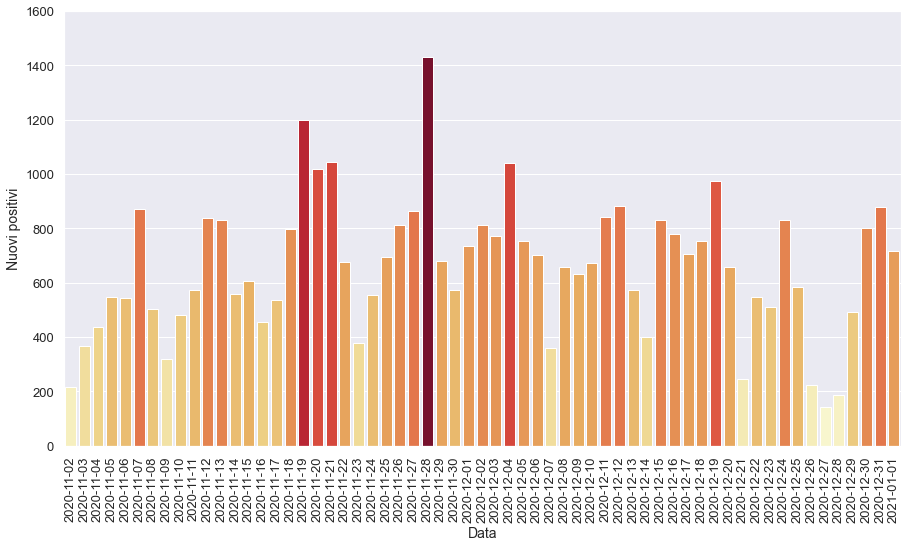

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

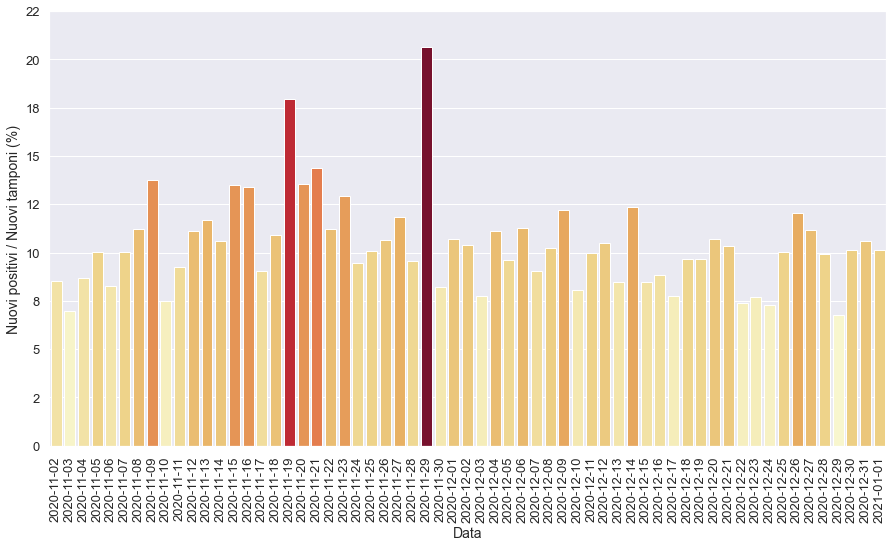

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

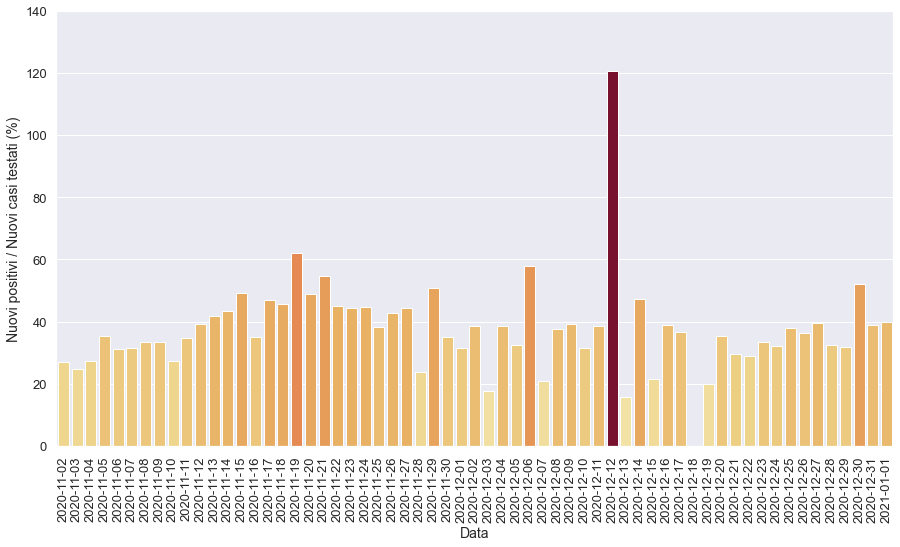

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

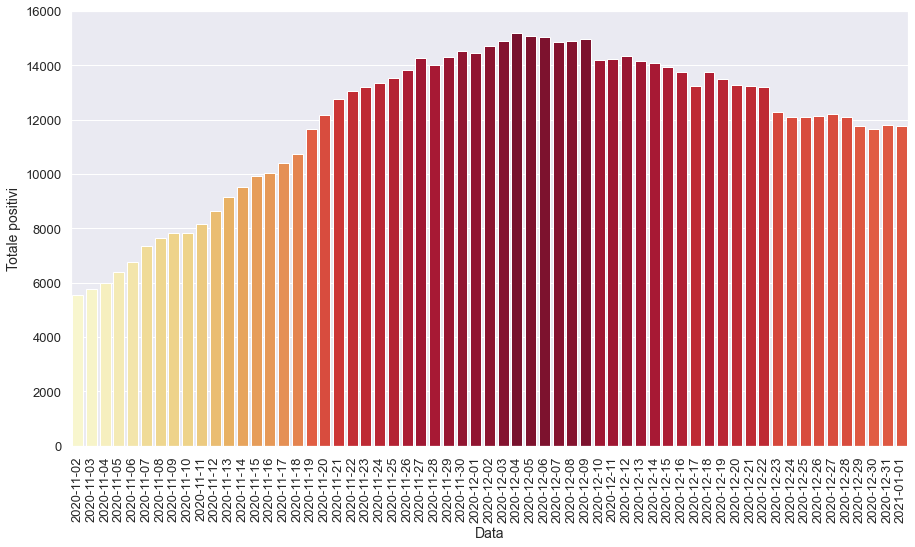

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

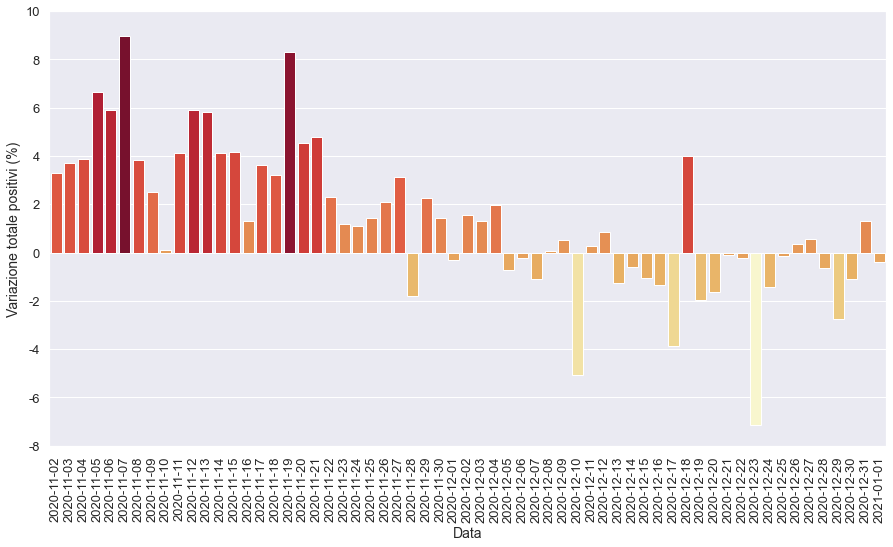

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

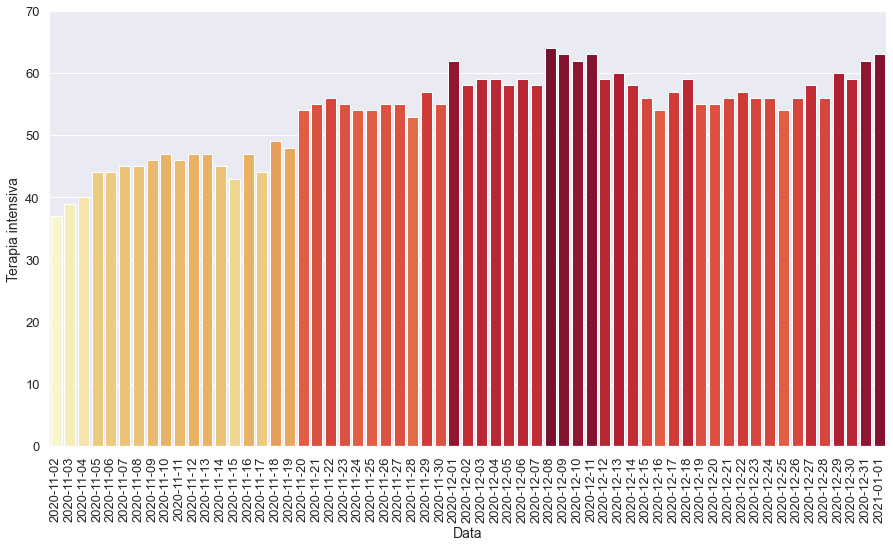

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

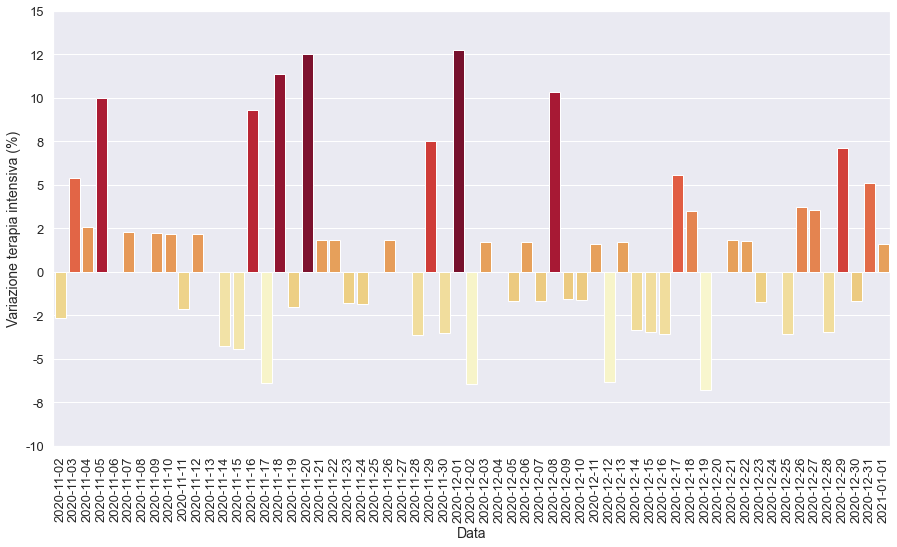

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

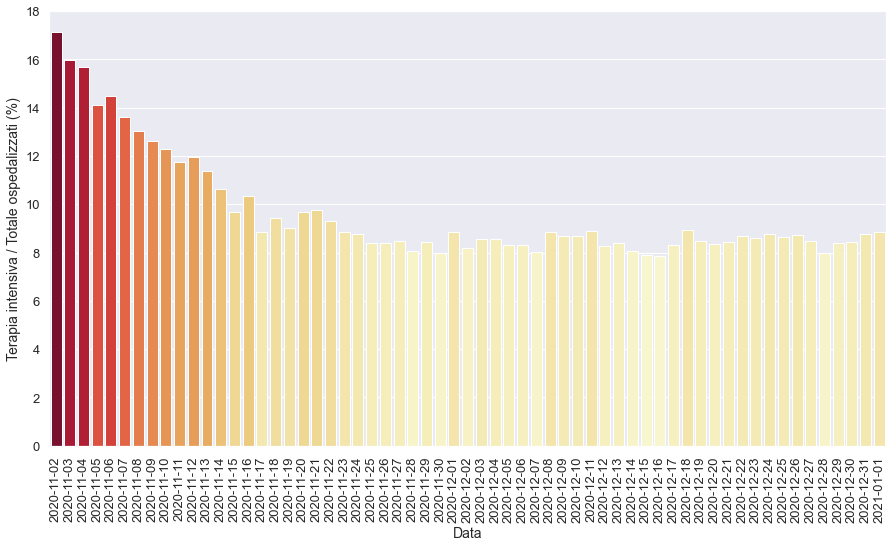

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

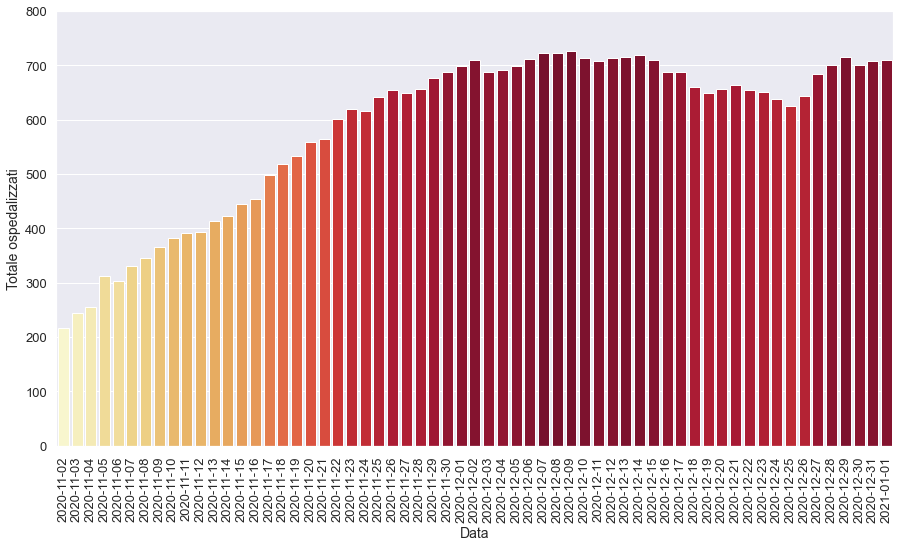

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

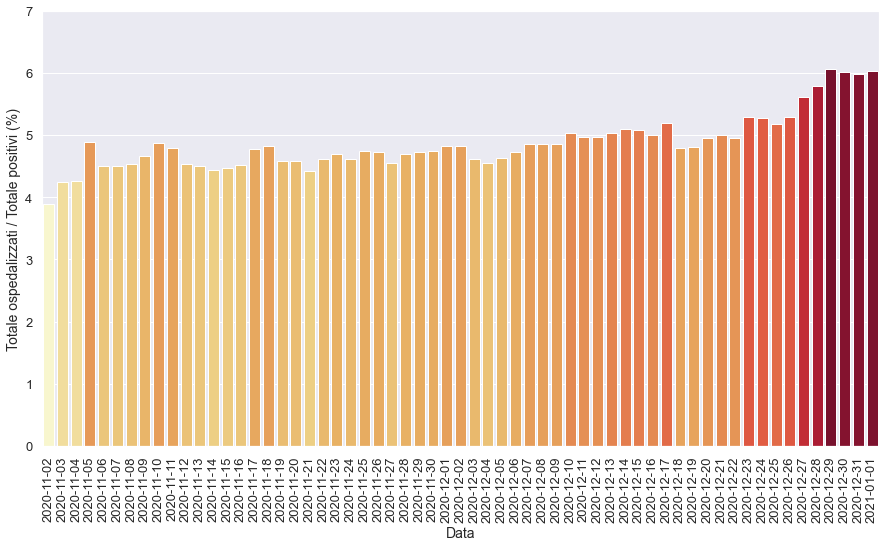

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

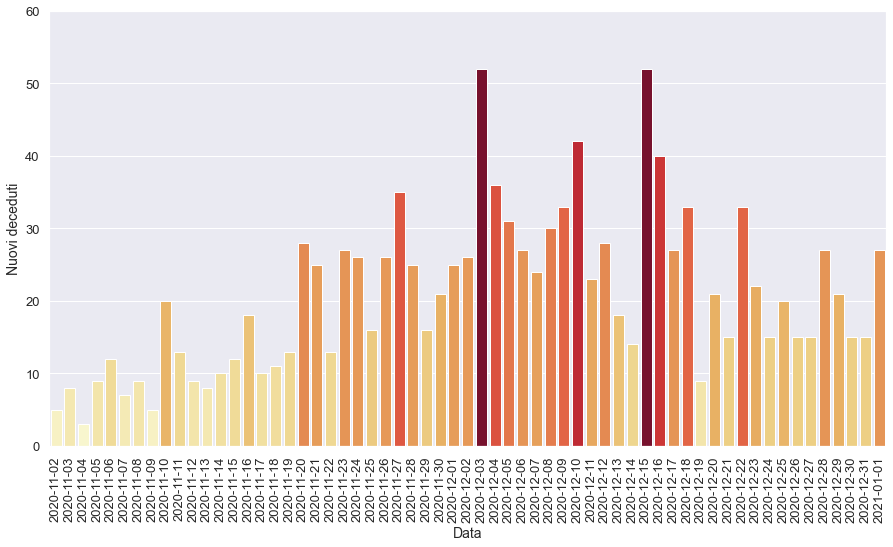

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

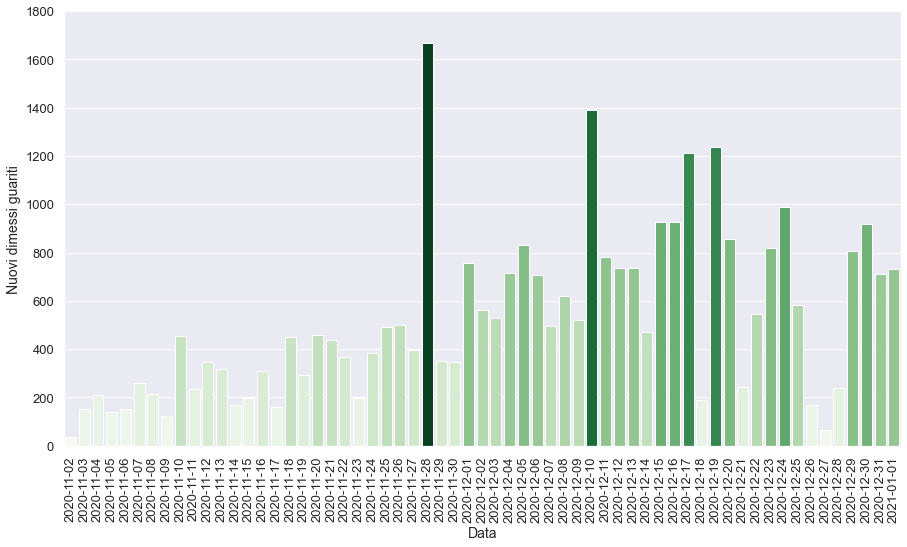

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-02T17:00:00,6,Friuli Venezia Giulia,652,58,710,13983,14693,225,812,...,26.0,7820.0,2100.0,214.0,8.17,4.83,10.38,38.67,-6.45,1.56
1,2020-12-03T17:00:00,6,Friuli Venezia Giulia,629,59,688,14195,14883,190,772,...,52.0,9970.0,4347.0,212.0,8.58,4.62,7.74,17.76,1.72,1.29
2,2020-12-04T17:00:00,6,Friuli Venezia Giulia,632,59,691,14482,15173,290,1040,...,36.0,9370.0,2706.0,287.0,8.54,4.55,11.10,38.43,0.00,1.95
3,2020-12-05T17:00:00,6,Friuli Venezia Giulia,640,58,698,14366,15064,-109,755,...,31.0,7853.0,2336.0,-116.0,8.31,4.63,9.61,32.32,-1.69,-0.72
4,2020-12-06T17:00:00,6,Friuli Venezia Giulia,652,59,711,14320,15031,-33,702,...,27.0,6227.0,1216.0,-46.0,8.30,4.73,11.27,57.73,1.72,-0.22
5,2020-12-07T17:00:00,6,Friuli Venezia Giulia,665,58,723,14146,14869,-162,359,...,24.0,3981.0,1720.0,-174.0,8.02,4.86,9.02,20.87,-1.69,-1.08
6,2020-12-08T17:00:00,6,Friuli Venezia Giulia,658,64,722,14155,14877,8,658,...,30.0,6427.0,1751.0,9.0,8.86,4.85,10.24,37.58,10.34,0.05
7,2020-12-09T17:00:00,6,Friuli Venezia Giulia,663,63,726,14229,14955,78,633,...,33.0,5190.0,1609.0,74.0,8.68,4.85,12.20,39.34,-1.56,0.52
8,2020-12-10T17:00:00,6,Friuli Venezia Giulia,652,62,714,13481,14195,-760,672,...,42.0,8356.0,2136.0,-748.0,8.68,5.03,8.04,31.46,-1.59,-5.08
9,2020-12-11T17:00:00,6,Friuli Venezia Giulia,644,63,707,13528,14235,40,843,...,23.0,8432.0,2182.0,47.0,8.91,4.97,10.00,38.63,1.61,0.28


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

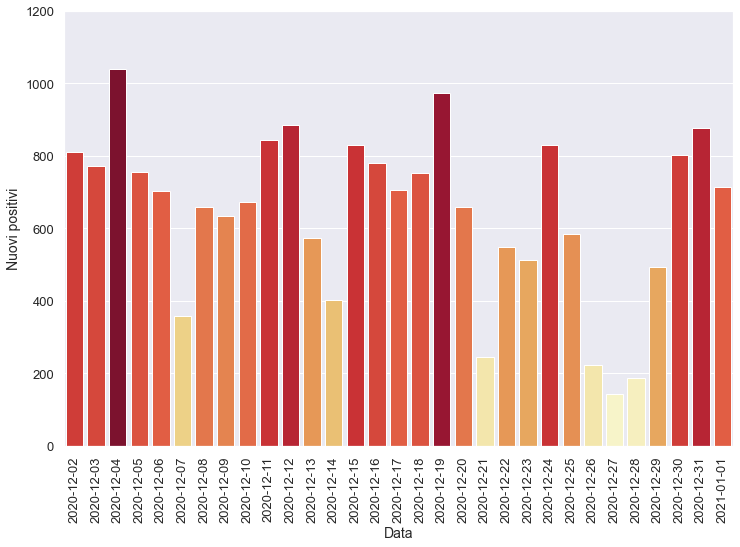

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

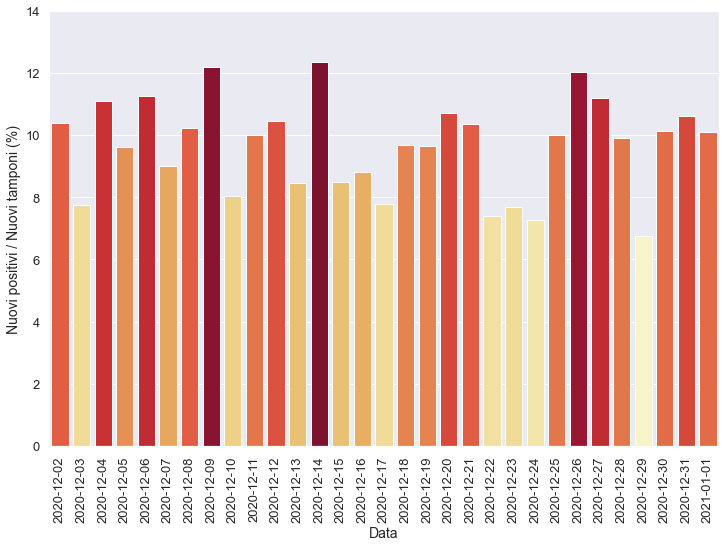

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

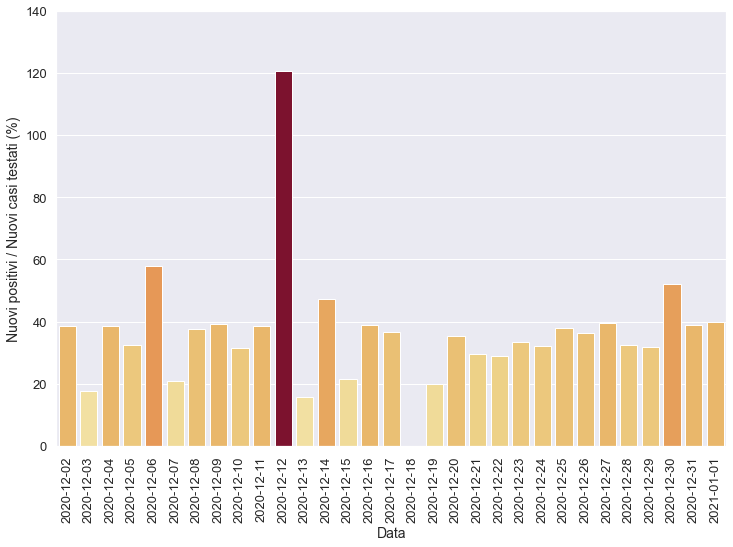

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

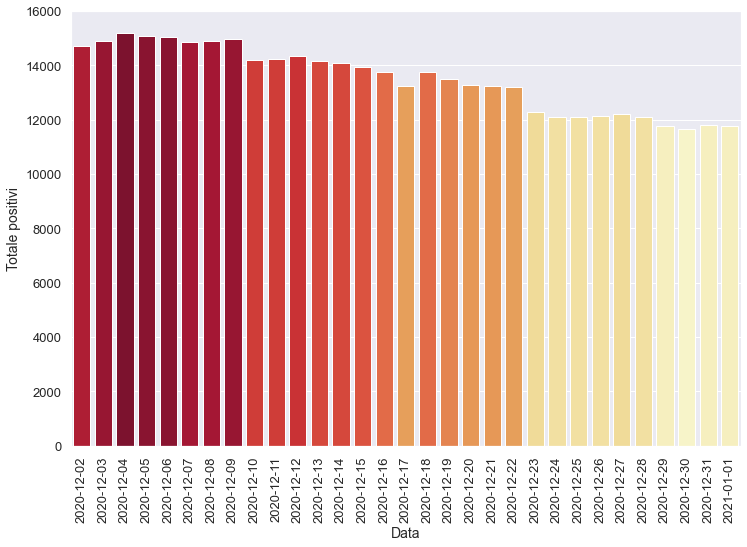

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

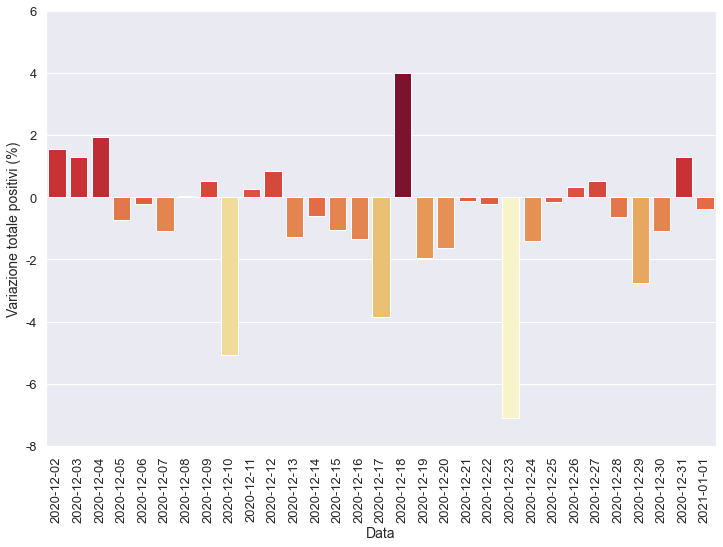

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

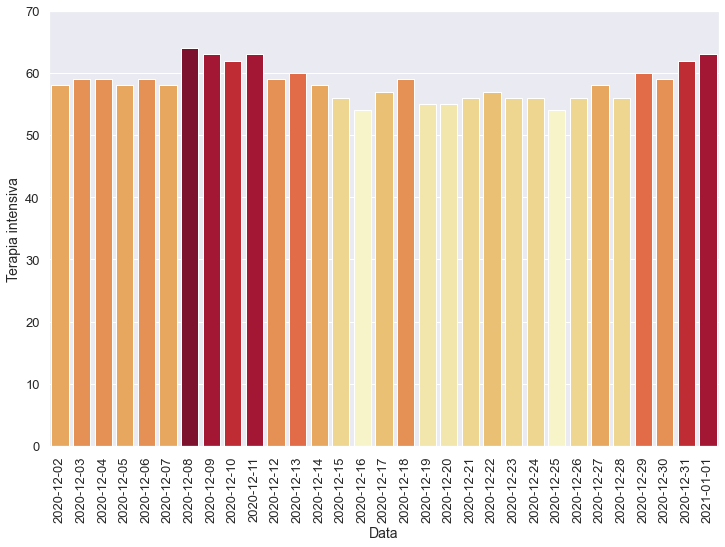

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

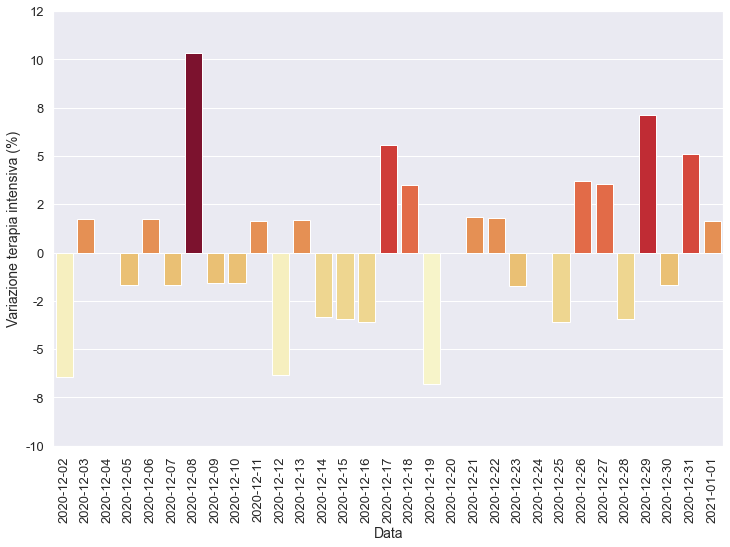

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

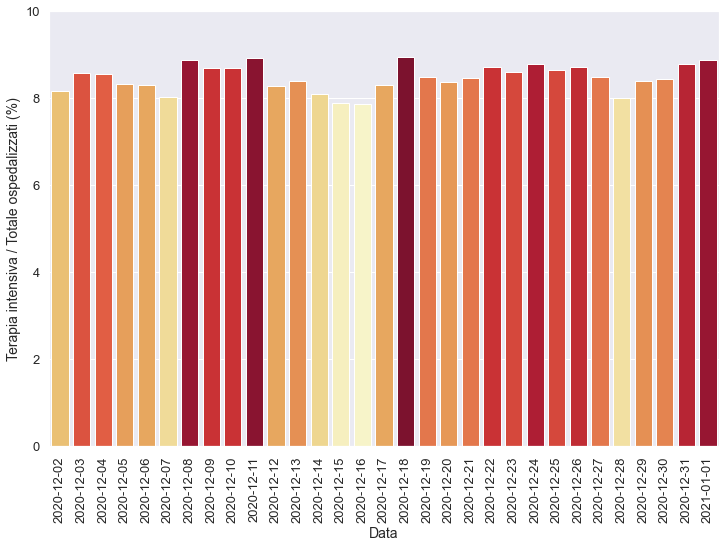

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

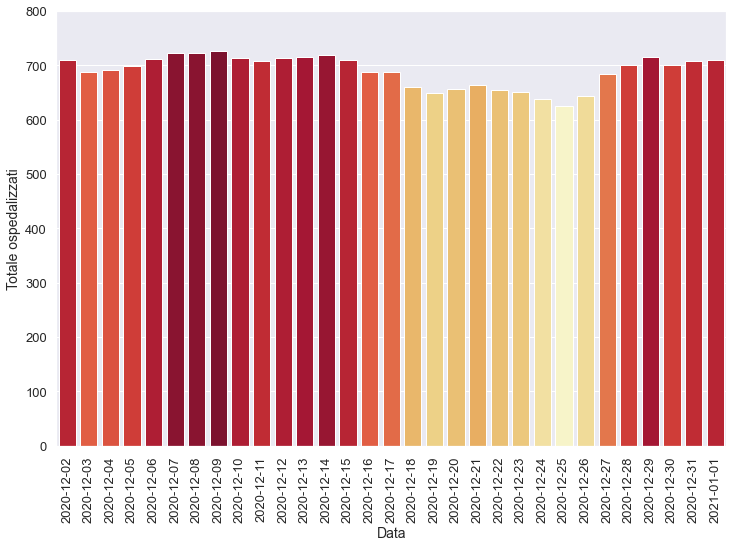

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

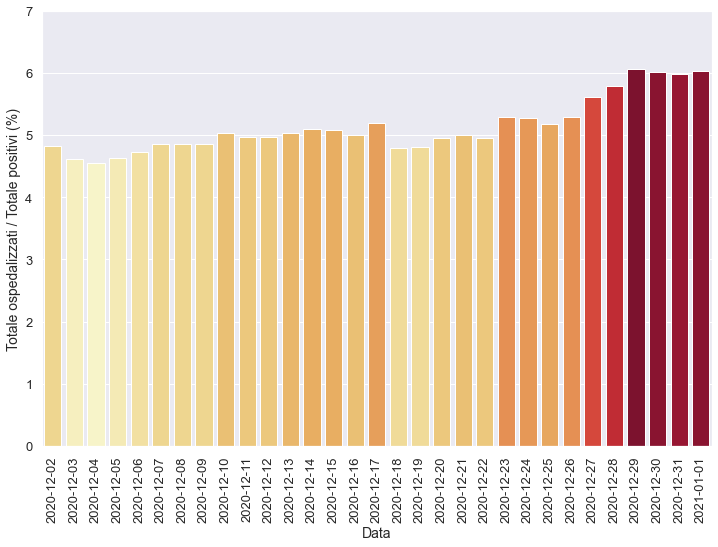

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

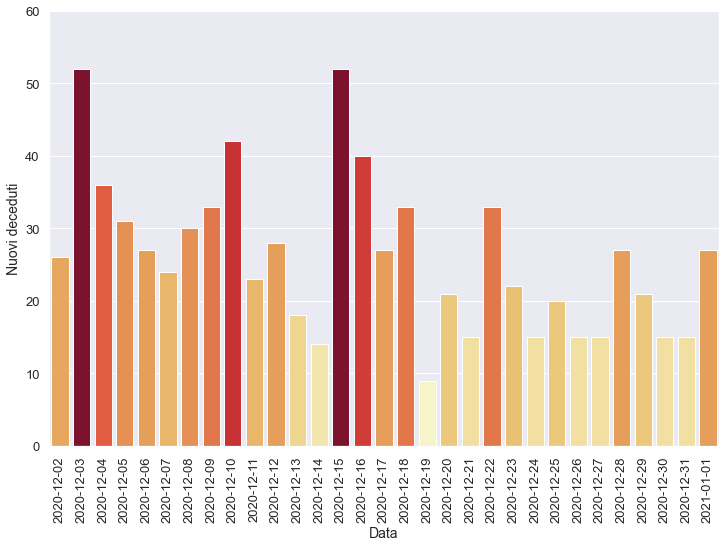

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

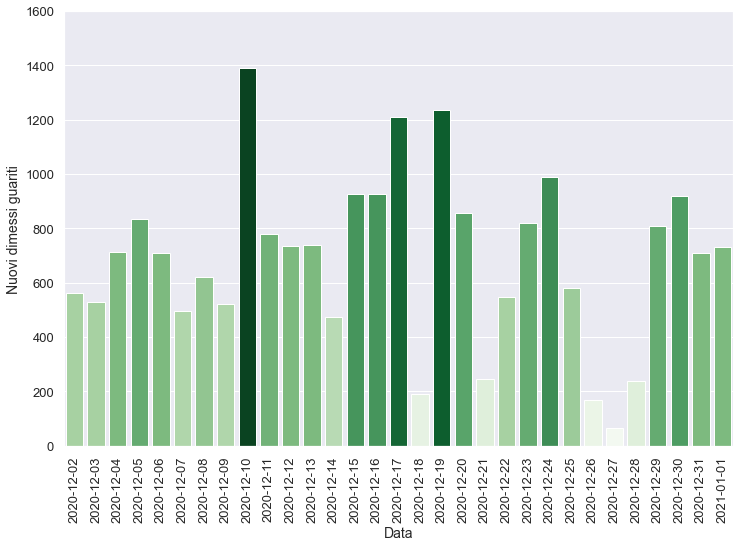

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-25T17:00:00,6,Friuli Venezia Giulia,572,54,626,11458,12084,-18,584,...,20.0,5835.0,1541.0,-6.0,8.63,5.18,10.01,37.90,-3.57,-0.15
1,2020-12-26T17:00:00,6,Friuli Venezia Giulia,587,56,643,11482,12125,41,224,...,15.0,1864.0,618.0,24.0,8.71,5.30,12.02,36.25,3.70,0.34
2,2020-12-27T17:00:00,6,Friuli Venezia Giulia,626,58,684,11506,12190,65,144,...,15.0,1287.0,363.0,24.0,8.48,5.61,11.19,39.67,3.57,0.54
3,2020-12-28T17:00:00,6,Friuli Venezia Giulia,645,56,701,11411,12112,-78,187,...,27.0,1888.0,576.0,-95.0,7.99,5.79,9.90,32.47,-3.45,-0.64
4,2020-12-29T17:00:00,6,Friuli Venezia Giulia,655,60,715,11062,11777,-335,493,...,21.0,7301.0,1554.0,-349.0,8.39,6.07,6.75,31.72,7.14,-2.77
5,2020-12-30T17:00:00,6,Friuli Venezia Giulia,641,59,700,10947,11647,-130,803,...,15.0,7930.0,1540.0,-115.0,8.43,6.01,10.13,52.14,-1.67,-1.10
6,2020-12-31T17:00:00,6,Friuli Venezia Giulia,645,62,707,11091,11798,151,877,...,15.0,8263.0,2248.0,144.0,8.77,5.99,10.61,39.01,5.08,1.30
7,2021-01-01T17:00:00,6,Friuli Venezia Giulia,647,63,710,11043,11753,-45,715,...,27.0,7071.0,1798.0,-48.0,8.87,6.04,10.11,39.77,1.61,-0.38


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

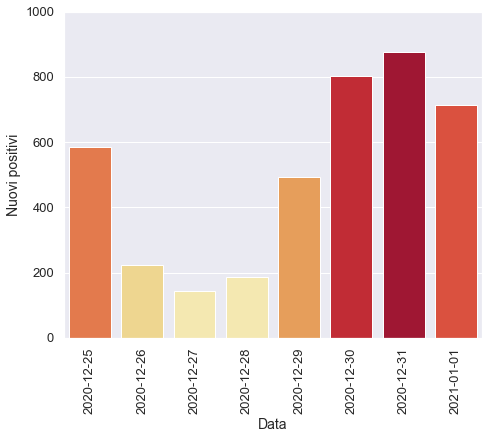

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

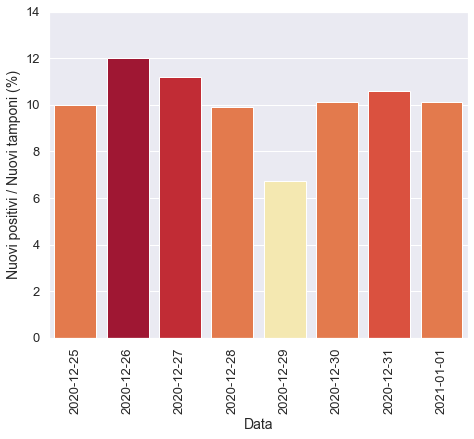

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

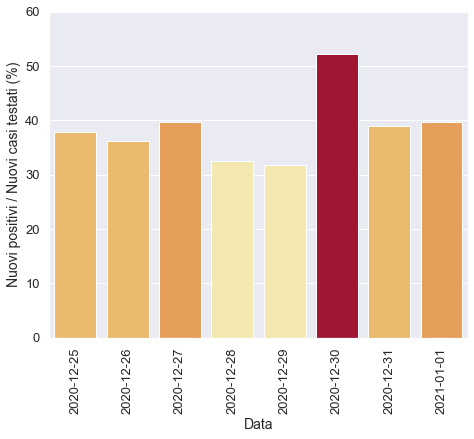

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

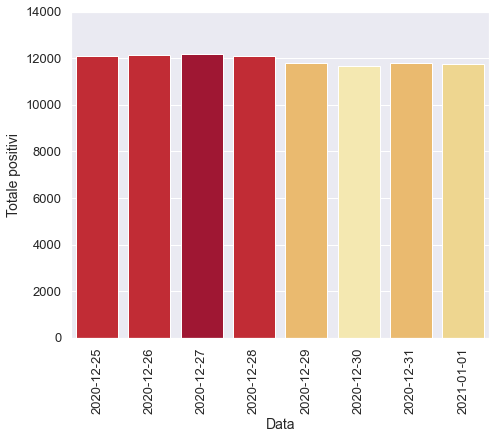

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

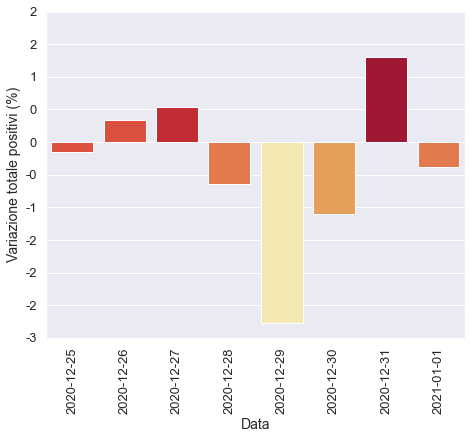

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

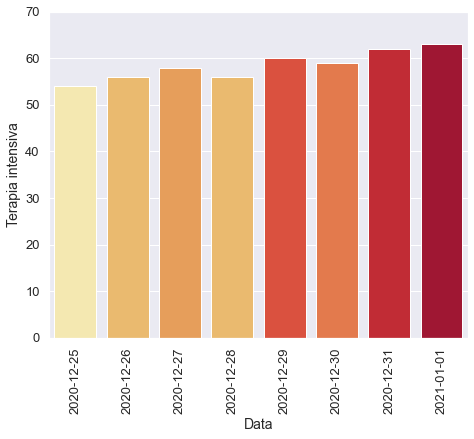

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

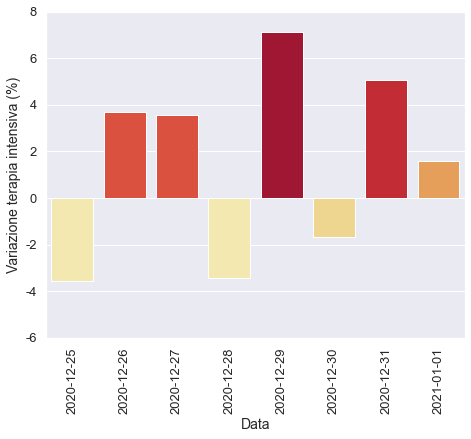

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

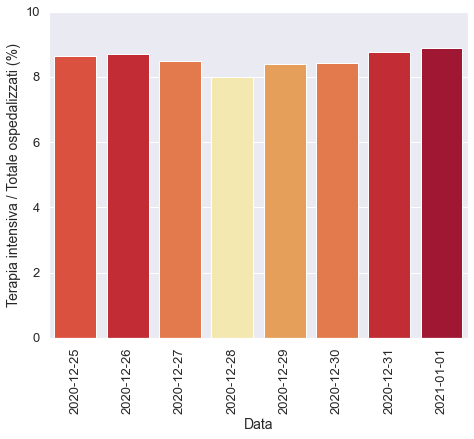

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

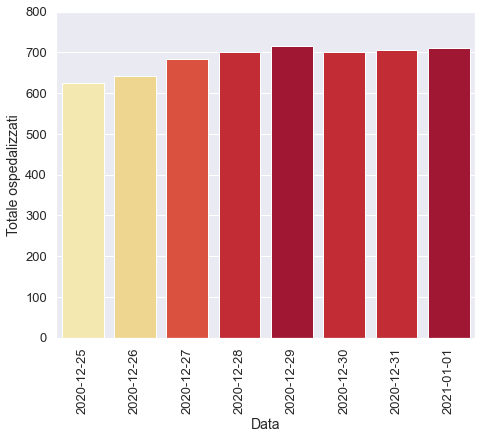

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

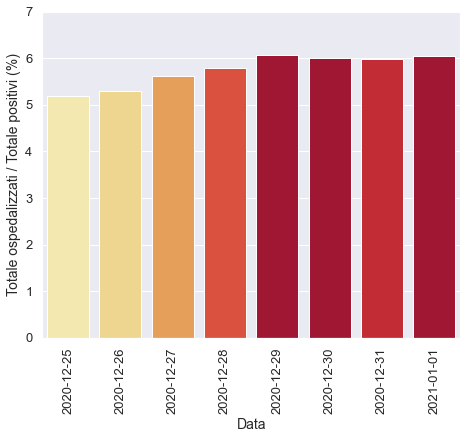

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

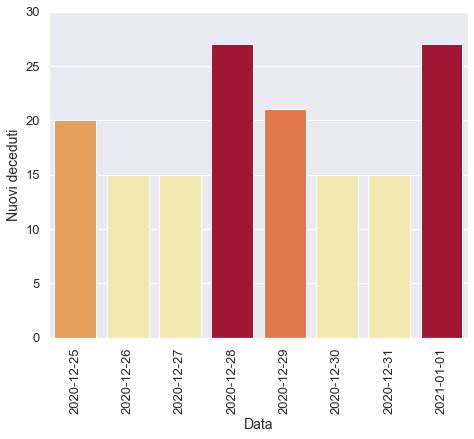

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

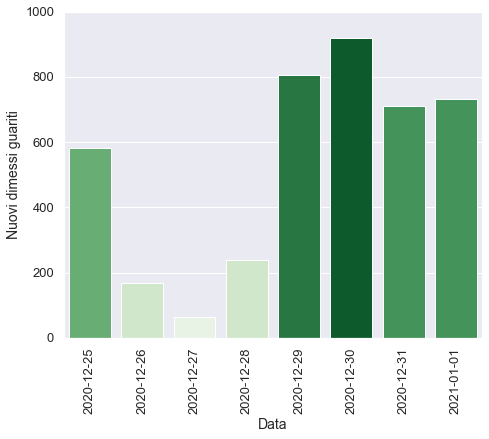

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)